# Gender Classification, Prediction based on Tweets

Using <b> three classification algorithms </b>, comparing accuracy, and finding which one is the <b>best model </b> for the given dataset (based on accuracy). <br>

Dependent varible: <b> Gender </b> <br>

<b> Data Visualization || Ensemble Learning || Logistic Regression || SVM || Random Forest || Accuracy calculation || Evaluation || Summary </b>

In [1]:
#Importing libraries

import pandas as pd
import numpy as np

In [2]:
#Reading csv

df=pd.read_csv("Information.csv", encoding = "ISO-8859-1", index_col=0)

In [3]:
df.head(3)

,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,description,...,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
_unit_id,,,,,,,,,,,,,,,,,,,,,
815719226,False,finalized,3,10/26/15 23:24,male,1.0000,yes,1.0,12/5/13 1:48,i sing my own rhythm.,...,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/15 12:40,6.587300e+17,main; @Kan1shk3,Chennai
815719227,False,finalized,3,10/26/15 23:30,male,1.0000,yes,1.0,10/1/12 13:51,I'm the author of novels filled with family dr...,...,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,ÛÏIt felt like they were my friends and I was...,NaN,7471,10/26/15 12:40,6.587300e+17,NaN,Eastern Time (US & Canada)
815719228,False,finalized,3,10/26/15 23:33,male,0.6625,yes,1.0,11/28/14 11:30,louis whining and squealing and all,...,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,NaN,5617,10/26/15 12:40,6.587300e+17,clcncl,Belgrade


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20050 entries, 815719226 to 815757985
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   _golden                20050 non-null  bool   
 1   _unit_state            20050 non-null  object 
 2   _trusted_judgments     20050 non-null  int64  
 3   _last_judgment_at      20000 non-null  object 
 4   gender                 19953 non-null  object 
 5   gender:confidence      20024 non-null  float64
 6   profile_yn             20050 non-null  object 
 7   profile_yn:confidence  20050 non-null  float64
 8   created                20050 non-null  object 
 9   description            16306 non-null  object 
 10  fav_number             20050 non-null  int64  
 11  gender_gold            50 non-null     object 
 12  link_color             20050 non-null  object 
 13  name                   20050 non-null  object 
 14  profile_yn_gold        50 non-null     obj

In [5]:
df.describe().columns

Index(['_trusted_judgments', 'gender:confidence', 'profile_yn:confidence',
       'fav_number', 'retweet_count', 'tweet_count', 'tweet_id'],
      dtype='object')

## Data Visualization

##### Correlation Matrix using heatmap

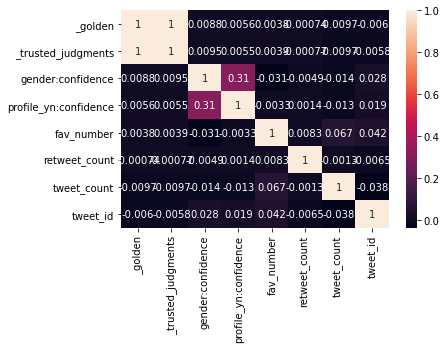

In [6]:
import seaborn as sb
sb.heatmap(df.corr(), annot=True)

###### Visualization of outliers using box-plot

In [7]:
df.describe()
# Outliers that are present in some columns are visualized using boxplot

,_trusted_judgments,gender:confidence,profile_yn:confidence,fav_number,retweet_count,tweet_count,tweet_id
count,20050.000000,20024.000000,20050.000000,20050.000000,20050.000000,2.005000e+04,2.005000e+04
mean,3.615711,0.882756,0.993221,4382.201646,0.079401,3.892469e+04,6.587350e+17
std,12.331890,0.191403,0.047168,12518.575919,2.649751,1.168371e+05,5.000124e+12
min,3.000000,0.000000,0.627200,0.000000,0.000000,1.000000e+00,6.587300e+17
25%,3.000000,0.677800,1.000000,11.000000,0.000000,2.398000e+03,6.587300e+17
50%,3.000000,1.000000,1.000000,456.000000,0.000000,1.144150e+04,6.587300e+17
75%,3.000000,1.000000,1.000000,3315.500000,0.000000,4.002750e+04,6.587400e+17
max,274.000000,1.000000,1.000000,341621.000000,330.000000,2.680199e+06,6.587400e+17


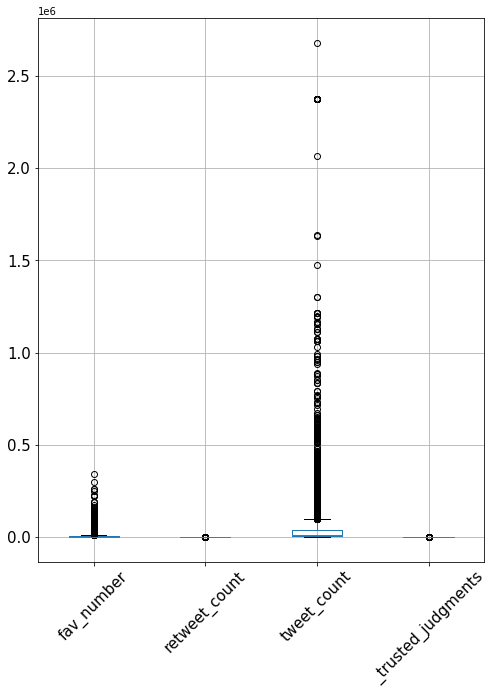

In [8]:
boxplot = df.boxplot(column=["fav_number", "retweet_count",'tweet_count', "_trusted_judgments"], grid=True, rot=45, fontsize=15, figsize=(8,10))

In [9]:
### Normalizing all data between 0 and 1
df["tweet_count"]=((df["tweet_count"]-df["tweet_count"].min())/(df["tweet_count"].max()-df["tweet_count"].min()))*1
df["retweet_count"]=((df["retweet_count"]-df["retweet_count"].min())/(df["retweet_count"].max()-df["retweet_count"].min()))*1

## Ensemble Modelling 

<b> Here we select certain columns that are relevent for training our model </b>

In [10]:
df = df[['_trusted_judgments',
       'gender', 'fav_number', 'retweet_count', 'tweet_count','_golden','sidebar_color',
         'link_color','profile_yn','_unit_state']]
df.describe()

,_trusted_judgments,fav_number,retweet_count,tweet_count
count,20050.000000,20050.000000,20050.000000,20050.000000
mean,3.615711,4382.201646,0.000241,0.014523
std,12.331890,12518.575919,0.008030,0.043593
min,3.000000,0.000000,0.000000,0.000000
25%,3.000000,11.000000,0.000000,0.000894
50%,3.000000,456.000000,0.000000,0.004269
75%,3.000000,3315.500000,0.000000,0.014934
max,274.000000,341621.000000,1.000000,1.000000


In [11]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20050 entries, 815719226 to 815757985
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   _trusted_judgments  20050 non-null  int64  
 1   gender              19953 non-null  object 
 2   fav_number          20050 non-null  int64  
 3   retweet_count       20050 non-null  float64
 4   tweet_count         20050 non-null  float64
 5   _golden             20050 non-null  bool   
 6   sidebar_color       20050 non-null  object 
 7   link_color          20050 non-null  object 
 8   profile_yn          20050 non-null  object 
 9   _unit_state         20050 non-null  object 
dtypes: bool(1), float64(2), int64(2), object(5)
memory usage: 1.5+ MB


In [12]:
# Data cleaning
df['gender'].replace('brand', np.nan, inplace=True) #replaces with np.nan
df['gender'].replace('unknown', np.nan, inplace=True) #replaces with np.nan
df=df.dropna() #dropping np.nan values

**Label Encoding**

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['_golden'] = le.fit_transform(df['_golden'])
df['sidebar_color'] = le.fit_transform(df['sidebar_color'])
df['link_color'] = le.fit_transform(df['link_color'])
df['profile_yn'] = le.fit_transform(df['profile_yn'])
df['_unit_state'] = le.fit_transform(df['_unit_state'])
df['gender'].replace('female', 1, inplace=True) #replaces with np.nan
df['gender'].replace('male', 0, inplace=True) #replaces with np.nan
df['gender'].unique()

array([0, 1], dtype=int64)

In [14]:
df = df.drop_duplicates() #remove duplicates

**Removing outliers**

Based on the boxplot above, we remove outliers in retweet count and tweet count 

In [15]:
df = df[df['retweet_count']<20] #removing outliers

In [16]:
df = df[df['tweet_count']<500000] #removing outliers

**Feature Selection, Splitting**

In [17]:
X = df[['_trusted_judgments', 'fav_number', 'retweet_count',
       'tweet_count']].values
Y = df[['gender']].values

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.10)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((11226, 4), (1248, 4), (11226, 1), (1248, 1))

## Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression  
lr = LogisticRegression()
lr.fit(X_train, Y_train)
y_pred = lr.predict(X_test)


C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


**Accuracy**

In [20]:
from sklearn.metrics import accuracy_score
print("Accuracy score is=",accuracy_score(y_pred, Y_test)*100,"%")

Accuracy score is= 50.96153846153846 %


In [21]:
#prediction of gender
#If output is 1, predicted gender is male. If it's zero, predicted gender is female
y_pred=lr.predict([[12,45,300,400]])[0]#pass X column values for which we predict
print("The predicted gender is=" , y_pred)

The predicted gender is= 1


**Evaluation**

In [22]:
from sklearn.metrics import confusion_matrix

y_pred = lr.predict(X_test)
ypred_prob = lr.predict_proba(X_test)
ypred_prob


array([[0.49660904, 0.50339096],
       [0.49974411, 0.50025589],
       [0.49968356, 0.50031644],
       ...,
       [0.49995703, 0.50004297],
       [0.49596447, 0.50403553],
       [0.49974411, 0.50025589]])

In [23]:
from sklearn.metrics import jaccard_score
print("Jaccard similarity score of model= ",jaccard_score(Y_test, y_pred))

Jaccard similarity score of model=  0.49836065573770494


In [24]:
#Log Loss
from sklearn.metrics import log_loss
print("Logarithmic loss value= ",log_loss(Y_test, ypred_prob))

Logarithmic loss value=  0.6919007496082097


## SVM

In [25]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(X_train, Y_train)

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVC()

In [26]:
Y_pred = svc.predict(X_test)

**Accuracy**

In [27]:
from sklearn.metrics import accuracy_score
print("Accuracy score of model = ", accuracy_score(y_pred, Y_test)*100,"%")

Accuracy score of model =  50.96153846153846 %


In [28]:
#Prediction
print("Prediction of gender=",svc.predict([[12,45,300,400]])[0]," . ")

Prediction of gender= 0  . 


**Evaluation**

In [29]:
from sklearn.metrics import classification_report
print ("Classfication report= ",classification_report(Y_test, y_pred))

Classfication report=                precision    recall  f1-score   support

           0       0.45      0.05      0.08       606
           1       0.51      0.95      0.67       642

    accuracy                           0.51      1248
   macro avg       0.48      0.50      0.37      1248
weighted avg       0.48      0.51      0.38      1248



## Random Forest 

In [30]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, Y_train)

<ipython-input-30-28399c325ea9>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train, Y_train)


RandomForestClassifier()

**Accuracy**

In [31]:
y_pred = rfc.predict(X_test)
print("Predicted gender=", rfc.predict([[12,45,300,400]])[0])

Predicted gender= 0


In [32]:
print("Accuracy score of model = ", accuracy_score(y_pred, Y_test)*100,"%")

Accuracy score of model =  52.00320512820513 %


**Evaluation**

In [33]:
from sklearn.metrics import classification_report
print ("Classification Report of model => ", classification_report(Y_test, y_pred))


Classification Report of model =>                precision    recall  f1-score   support

           0       0.51      0.50      0.50       606
           1       0.53      0.54      0.54       642

    accuracy                           0.52      1248
   macro avg       0.52      0.52      0.52      1248
weighted avg       0.52      0.52      0.52      1248



# Summary

As per accuracy, <b> Random Forest </b> is the best classification for this dataset.